In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
from joblib import dump, load

In [2]:
# Read training images
Training_data_folder = 'Training Dataset/'
char_data_folders = [('character_' + str(i) + '/') for i in range(10)]
char_images = [str(i) + '.csv' for i in range(1, 1001)]
train_data = []
for char_num in char_data_folders:
    char_data = []
    for char_img in char_images:
        img_data = np.genfromtxt(Training_data_folder + char_num + char_img, delimiter = ',')
        char_data.append(img_data)
    train_data.append(char_data)

train_data = np.array(train_data)

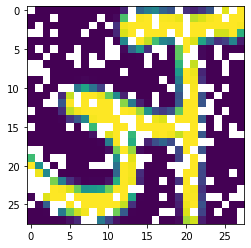

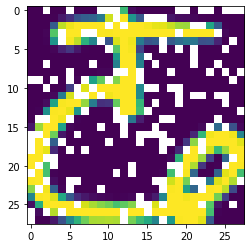

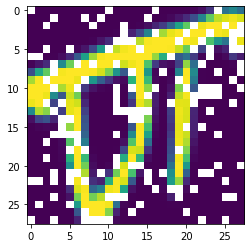

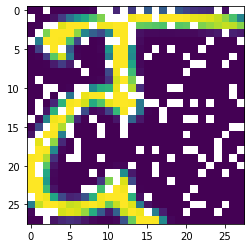

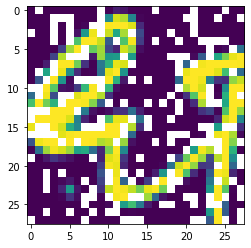

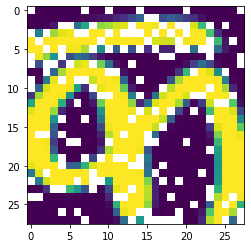

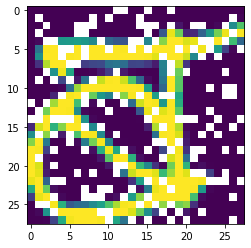

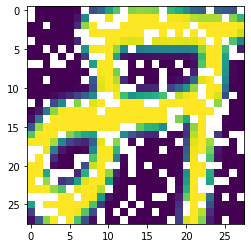

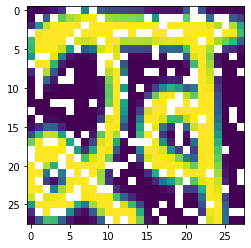

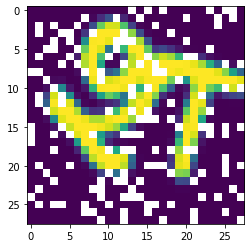

In [3]:
# Visualizing training images
for i in range(10):
    plt.figure()
    plt.imshow(train_data[i][0])

In [12]:
# Imputing the NaN values by taking average of neighbouring pixels
imputed_train = train_data.copy()
for char_no in range(10):
    for img_no in range(1000):
        curr_img = imputed_train[char_no, img_no, :, :]
        #plt.figure()
        #plt.imshow(curr_img)
        mask =  cv2.adaptiveThreshold(np.array(np.isnan(curr_img)*255, dtype = np.uint8), 255, \
                                     cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
        curr_img = np.array(curr_img, dtype = np.uint8)
        imputed_img = cv2.inpaint(curr_img, mask, 1, cv2.INPAINT_TELEA)
        imputed_train[char_no, img_no, :, :] = imputed_img

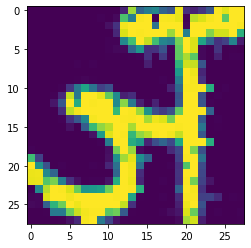

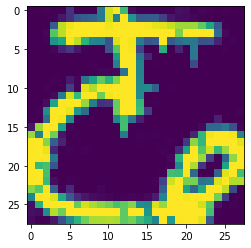

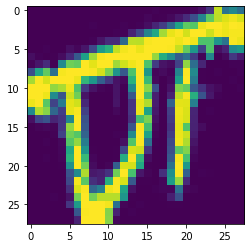

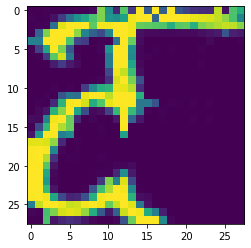

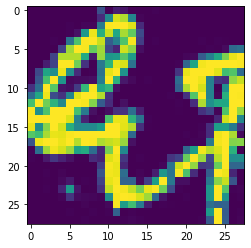

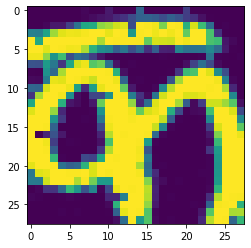

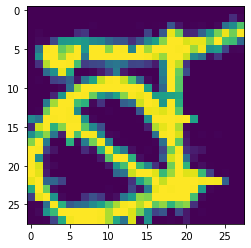

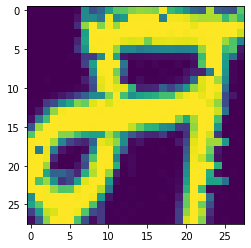

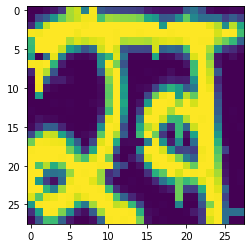

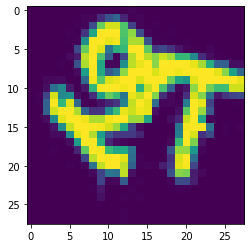

In [13]:
# Visualizing the imputed images
for char_no in range(10):
    plt.figure()
    plt.imshow(imputed_train[char_no, 0, :, :])

In [14]:
# Preparing X and Y arrays for training the model
Xdata, Ydata = [], []
for char_no in range(10):
    for img_no in range(1000):
        Xdata.append(imputed_train[char_no, img_no, :, :].flatten())
        Ydata.append(char_no)
        
Xdata = np.array(Xdata, dtype = np.float64)
Ydata = np.array(Ydata, dtype = np.int32)
print(Xdata.shape)
print(Ydata.shape)

(10000, 784)
(10000,)


In [15]:
# Dividing into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(Xdata, Ydata, test_size = 0.2, random_state = 10)

In [16]:
# SVM with polynomial kernel
pca_comp = [50, 100, 200]
degrees = [1,2,4,8]
reg_params = [1, 10, 100, 1000]
print('Validation results for SVC with polynomial kernel')
for num_comp in pca_comp:
    for deg in degrees:
        for reg_param in reg_params:
            pca_mod = PCA(n_components = num_comp)
            Xtrain_trans = pca_mod.fit_transform(Xtrain)
            clf1 = SVC(kernel = 'poly', degree = deg, C = reg_param)
            clf1.fit(Xtrain_trans, Ytrain)
            Xval_trans = pca_mod.transform(Xval)
            Ypred = clf1.predict(Xval_trans)
            acc_mod = accuracy_score(Yval, Ypred)
            f1_mod = f1_score(Yval, Ypred, average = 'weighted')
            print('PCs = {}, degree = {}, reg_param = {} : accuracy = {}, f1 score = {}'.format(num_comp,\
            deg, reg_param, acc_mod, f1_mod))        

Validation results for SVC with polynomial kernel
PCs = 50, degree = 1, reg_param = 1 : accuracy = 0.863, f1 score = 0.8623163399666621
PCs = 50, degree = 1, reg_param = 10 : accuracy = 0.8595, f1 score = 0.858614820206297
PCs = 50, degree = 1, reg_param = 100 : accuracy = 0.846, f1 score = 0.8454034584465876
PCs = 50, degree = 1, reg_param = 1000 : accuracy = 0.8465, f1 score = 0.846017249727341
PCs = 50, degree = 2, reg_param = 1 : accuracy = 0.9475, f1 score = 0.9475175103504314
PCs = 50, degree = 2, reg_param = 10 : accuracy = 0.9545, f1 score = 0.9545460201250539
PCs = 50, degree = 2, reg_param = 100 : accuracy = 0.952, f1 score = 0.9520412142931429
PCs = 50, degree = 2, reg_param = 1000 : accuracy = 0.951, f1 score = 0.9510277844785046
PCs = 50, degree = 4, reg_param = 1 : accuracy = 0.9335, f1 score = 0.9343583097596502
PCs = 50, degree = 4, reg_param = 10 : accuracy = 0.9485, f1 score = 0.9485844623963309
PCs = 50, degree = 4, reg_param = 100 : accuracy = 0.9475, f1 score = 0.9

In [17]:
# SVM with sigmoid kernel
pca_comp = [50, 100, 200]
reg_params = [1, 10, 100, 1000]
print('Validation results for SVC with sigmoid kernel')
for num_comp in pca_comp:
    for reg_param in reg_params:
            pca_mod = PCA(n_components = num_comp)
            Xtrain_trans = pca_mod.fit_transform(Xtrain)
            clf2 = SVC(kernel = 'sigmoid', C = reg_param)
            clf2.fit(Xtrain_trans, Ytrain)
            Xval_trans = pca_mod.transform(Xval)
            Ypred = clf2.predict(Xval_trans)
            acc_mod = accuracy_score(Yval, Ypred)
            f1_mod = f1_score(Yval, Ypred, average = 'weighted')
            print('PCs = {}, reg_param = {} : accuracy = {}, f1 score = {}'.format(num_comp,\
            reg_param, acc_mod, f1_mod))

Validation results for SVC with sigmoid kernel
PCs = 50, reg_param = 1 : accuracy = 0.7255, f1 score = 0.7290402251789173
PCs = 50, reg_param = 10 : accuracy = 0.6625, f1 score = 0.6693322974390478
PCs = 50, reg_param = 100 : accuracy = 0.653, f1 score = 0.6614171217103928
PCs = 50, reg_param = 1000 : accuracy = 0.6485, f1 score = 0.6556913158249483
PCs = 100, reg_param = 1 : accuracy = 0.769, f1 score = 0.7707561926681856
PCs = 100, reg_param = 10 : accuracy = 0.703, f1 score = 0.7072982952967232
PCs = 100, reg_param = 100 : accuracy = 0.692, f1 score = 0.698446840980158
PCs = 100, reg_param = 1000 : accuracy = 0.6855, f1 score = 0.6913885454420813
PCs = 200, reg_param = 1 : accuracy = 0.7945, f1 score = 0.7949046052777494
PCs = 200, reg_param = 10 : accuracy = 0.72, f1 score = 0.7228560026695063
PCs = 200, reg_param = 100 : accuracy = 0.6975, f1 score = 0.7020649341142827
PCs = 200, reg_param = 1000 : accuracy = 0.698, f1 score = 0.7032925309312563


In [11]:
# SVM with rbf kernel
pca_comp = [50, 100, 200]
reg_params = [1, 10, 100, 1000]
for num_comp in pca_comp:
    for reg_param in reg_params:
            pca_mod = PCA(n_components = num_comp)
            Xtrain_trans = pca_mod.fit_transform(Xtrain)
            clf2 = SVC(kernel = 'rbf', C = reg_param)
            clf2.fit(Xtrain_trans, Ytrain)
            Xval_trans = pca_mod.transform(Xval)
            Ypred = clf2.predict(Xval_trans)
            acc_mod = accuracy_score(Yval, Ypred)
            f1_mod = f1_score(Yval, Ypred, average = 'weighted')
            print('PCs = {}, reg_param = {} : accuracy = {}, f1 score = {}'.format(num_comp,\
            reg_param, acc_mod, f1_mod))

PCs = 50, reg_param = 1 : accuracy = 0.958, f1 score = 0.9579372426683199
PCs = 50, reg_param = 10 : accuracy = 0.9675, f1 score = 0.9674856331322934
PCs = 50, reg_param = 100 : accuracy = 0.9685, f1 score = 0.9684837079609049
PCs = 50, reg_param = 1000 : accuracy = 0.967, f1 score = 0.9669864318688626
PCs = 100, reg_param = 1 : accuracy = 0.955, f1 score = 0.9549281898402633
PCs = 100, reg_param = 10 : accuracy = 0.965, f1 score = 0.9650060711518634
PCs = 100, reg_param = 100 : accuracy = 0.9635, f1 score = 0.9635143846484658
PCs = 100, reg_param = 1000 : accuracy = 0.963, f1 score = 0.9630288298109838
PCs = 200, reg_param = 1 : accuracy = 0.9505, f1 score = 0.9504330795353585
PCs = 200, reg_param = 10 : accuracy = 0.961, f1 score = 0.9610021289012176
PCs = 200, reg_param = 100 : accuracy = 0.96, f1 score = 0.9600021088066749
PCs = 200, reg_param = 1000 : accuracy = 0.9605, f1 score = 0.9605102321792262


In [18]:
# kNN
pca_comp = [50, 100, 200]
num_neighbors = [1, 3, 5, 10, 20]
print('Validation results for KNN')
for num_comp in pca_comp:
    for neigh in num_neighbors:
            pca_mod = PCA(n_components = num_comp)
            Xtrain_trans = pca_mod.fit_transform(Xtrain)
            clf3 = KNeighborsClassifier(n_neighbors = neigh)
            clf3.fit(Xtrain_trans, Ytrain)
            Xval_trans = pca_mod.transform(Xval)
            Ypred = clf3.predict(Xval_trans)
            acc_mod = accuracy_score(Yval, Ypred)
            f1_mod = f1_score(Yval, Ypred, average = 'weighted')
            print('PCs = {}, neighbors = {} : accuracy = {}, f1 score = {}'.format(num_comp,\
            neigh, acc_mod, f1_mod))

Validation results for KNN
PCs = 50, neighbors = 1 : accuracy = 0.951, f1 score = 0.9509549989217797
PCs = 50, neighbors = 3 : accuracy = 0.9495, f1 score = 0.9493831774227252
PCs = 50, neighbors = 5 : accuracy = 0.952, f1 score = 0.951910811067762
PCs = 50, neighbors = 10 : accuracy = 0.946, f1 score = 0.945865884776275
PCs = 50, neighbors = 20 : accuracy = 0.9345, f1 score = 0.9341539066739063
PCs = 100, neighbors = 1 : accuracy = 0.957, f1 score = 0.9569697165957635
PCs = 100, neighbors = 3 : accuracy = 0.946, f1 score = 0.9458446439157818
PCs = 100, neighbors = 5 : accuracy = 0.9515, f1 score = 0.9513984325846834
PCs = 100, neighbors = 10 : accuracy = 0.9445, f1 score = 0.9442704915559678
PCs = 100, neighbors = 20 : accuracy = 0.93, f1 score = 0.9295972057473991
PCs = 200, neighbors = 1 : accuracy = 0.9545, f1 score = 0.954501276306177
PCs = 200, neighbors = 3 : accuracy = 0.9405, f1 score = 0.9403030629318545
PCs = 200, neighbors = 5 : accuracy = 0.938, f1 score = 0.93771826329731

In [24]:
# Random Forest- Cross Validation using Grid Search
pca_mod = PCA(n_components = 50)
Xdata_trans = pca_mod.fit_transform(Xdata)
params_grid = {'max_depth': [10, 20, 50, 100], 'min_samples_leaf': [1,2,5,10]}
rand_forest = RandomForestClassifier()
model_cv = GridSearchCV(rand_forest, params_grid, scoring = 'f1_weighted', verbose = 2)
model_cv.fit(Xdata_trans, Ydata)
# Reporting the optimal hyperparameter values
opt_params = model_cv.best_params_
print('Cross validation based grid search for Random Forest hyperparameters')
print("The optimal hyperparameters are:")
print(opt_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=10, min_samples_leaf=1 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_depth=10, min_samples_leaf=1, total=   3.0s
[CV] max_depth=10, min_samples_leaf=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ................. max_depth=10, min_samples_leaf=1, total=   3.2s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV] ................. max_depth=10, min_samples_leaf=1, total=   3.0s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV] ................. max_depth=10, min_samples_leaf=1, total=   3.2s
[CV] max_depth=10, min_samples_leaf=1 ................................
[CV] ................. max_depth=10, min_samples_leaf=1, total=   3.3s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] ................. max_depth=10, min_samples_leaf=2, total=   3.4s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] ................. max_depth=10, min_samples_leaf=2, total=   3.4s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] ................. max_depth=10, min_samples_leaf=2, total=   3.2s
[CV] max_depth=10, min_samples_leaf=2 ................................
[CV] .

[CV] ................ max_depth=50, min_samples_leaf=10, total=   3.2s
[CV] max_depth=100, min_samples_leaf=1 ...............................
[CV] ................ max_depth=100, min_samples_leaf=1, total=   4.0s
[CV] max_depth=100, min_samples_leaf=1 ...............................
[CV] ................ max_depth=100, min_samples_leaf=1, total=   3.8s
[CV] max_depth=100, min_samples_leaf=1 ...............................
[CV] ................ max_depth=100, min_samples_leaf=1, total=   4.0s
[CV] max_depth=100, min_samples_leaf=1 ...............................
[CV] ................ max_depth=100, min_samples_leaf=1, total=   4.1s
[CV] max_depth=100, min_samples_leaf=1 ...............................
[CV] ................ max_depth=100, min_samples_leaf=1, total=   4.2s
[CV] max_depth=100, min_samples_leaf=2 ...............................
[CV] ................ max_depth=100, min_samples_leaf=2, total=   4.0s
[CV] max_depth=100, min_samples_leaf=2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.6min finished


Cross validation based grid search for Random Forest hyperparameters
The optimal hyperparameters are:
{'max_depth': 100, 'min_samples_leaf': 1}


In [25]:
# Retraining random forest using optimal hyperparameters
pca_mod = PCA(n_components = num_comp)
Xtrain_trans = pca_mod.fit_transform(Xtrain)
Xval_trans = pca_mod.transform(Xval)
rand_forest_clf = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1)
rand_forest_clf.fit(Xtrain_trans, Ytrain)
Ypred = rand_forest_clf.predict(Xval_trans)
print('Accuracy score = {}'.format(accuracy_score(Yval, Ypred)))
print('F1 score = {}'.format(f1_score(Yval, Ypred, average = 'weighted')))

Accuracy score = 0.8815
F1 score = 0.8807204439753222


In [26]:
# Fine-tuned Grid Search CV for hyperparameter tuning of best performing models
pca_mod = PCA(n_components = 50)
Xdata_trans = pca_mod.fit_transform(Xdata)

# SVM- polynomial kernel (degree = 2)
params_grid = {'C': np.logspace(0.0, 2.3, num = 10)}
svc_poly = SVC(kernel = 'poly', degree = 2)
cv_svc_poly = GridSearchCV(svc_poly, params_grid, scoring = 'f1_weighted', verbose = 2)
cv_svc_poly.fit(Xdata_trans, Ydata)
opt_svc_poly = cv_svc_poly.best_params_
print('\nCross validation based grid search for SVC- polynomial kernel (degree = 2)')
print("The optimal hyperparameters are:")
print(opt_svc_poly)
print('The best score is: {}'.format(cv_svc_poly.best_score_))


# SVM- rbf kernel
params_grid = {'C': np.logspace(0.0, 2.3, num = 10)}
svc_rbf = SVC(kernel = 'rbf')
cv_svc_rbf = GridSearchCV(svc_rbf, params_grid, scoring = 'f1_weighted', verbose = 2)
cv_svc_rbf.fit(Xdata_trans, Ydata)
opt_svc_rbf = cv_svc_rbf.best_params_
print('\nCross validation based grid search for SVC- rbf kernel')
print("The optimal hyperparameters are:")
print(opt_svc_rbf)
print('The best score is: {}'.format(cv_svc_rbf.best_score_))

# kNN
params_grid = {'n_neighbors': list(range(1, 11))}
knn_clf = KNeighborsClassifier()
cv_knn = GridSearchCV(knn_clf, params_grid, scoring = 'f1_weighted', verbose = 2)
cv_knn.fit(Xdata_trans, Ydata)
opt_knn = cv_knn.best_params_
print('\nCross validation based grid search for kNN')
print("The optimal hyperparameters are:")
print(opt_knn)
print('The best score is: {}'.format(cv_knn.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=1.0, total=   1.9s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............................................ C=1.0, total=   2.1s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   2.2s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   2.2s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   2.3s
[CV] C=1.801173528334133 .............................................
[CV] .............................. C=1.801173528334133, total=   2.1s
[CV] C=1.801173528334133 .............................................
[CV] .............................. C=1.801173528334133, total=   2.0s
[CV] C=1.801173528334133 .............................................
[CV] .............................. C=1.801173528334133, total=   2.0s
[CV] C=1.801173528334133 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished



Cross validation based grid search for SVC- polynomial kernel (degree = 2)
The optimal hyperparameters are:
{'C': 1.801173528334133}
The best score is: 0.9561262697993579
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=1.0, total=   1.9s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............................................ C=1.0, total=   2.0s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   1.9s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   1.9s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   2.0s
[CV] C=1.801173528334133 .............................................
[CV] .............................. C=1.801173528334133, total=   1.9s
[CV] C=1.801173528334133 .............................................
[CV] .............................. C=1.801173528334133, total=   2.0s
[CV] C=1.801173528334133 .............................................
[CV] .............................. C=1.801173528334133, total=   1.9s
[CV] C=1.801173528334133 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished



Cross validation based grid search for SVC- rbf kernel
The optimal hyperparameters are:
{'C': 3.24422607917163}
The best score is: 0.9686810992413932
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   1.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   1.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   1.0s
[CV] n_neighbors=2 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.1s finished


In [27]:
# Voting classifier using the best hyperparameters of each model
# Evaluating the voting classifier using k Fold cross validation
clf1_svc_poly = SVC(kernel = 'poly', degree = 2, C = 3.2442)
clf2_svc_rbf = SVC(kernel = 'rbf', C = 3.2442)
clf3_knn = KNeighborsClassifier(n_neighbors = 5)

In [29]:
# Performing 10 fold cross-validation for voting classifier
voting_clf = VotingClassifier(estimators = [('clf1_svc_poly', clf1_svc_poly), ('clf2_svc_rbf', clf2_svc_rbf) \
,('clf3_knn', clf3_knn)])
pca_mod = PCA(n_components = 50)
Xdata_trans = pca_mod.fit_transform(Xdata)
kf = KFold(n_splits = 10, shuffle = True, random_state = 34)
avg_f1, avg_acc = 0, 0
for train_index, test_index in kf.split(Xdata_trans):
    Xtrain_cv, Xtest_cv = Xdata_trans[train_index], Xdata_trans[test_index]
    Ytrain_cv, Ytest_cv = Ydata[train_index], Ydata[test_index]
    voting_clf.fit(Xtrain_cv, Ytrain_cv)
    Ypred_cv = voting_clf.predict(Xtest_cv)
    avg_f1 += (f1_score(Ytest_cv, Ypred_cv, average = 'weighted')/10)
    avg_acc += (accuracy_score(Ytest_cv, Ypred_cv)/10)

print('Average F1 score = {}'.format(avg_f1))
print('Average accuracy score = {}'.format(avg_acc))

KeyboardInterrupt: 

In [30]:
# Refitting the voting classifier on the entire training set
pca_mod = PCA(n_components = 50)
Xdata_trans = pca_mod.fit_transform(Xdata)
clf1_svc_poly_final = SVC(kernel = 'poly', degree = 2, C = 3.2442)
clf2_svc_rbf_final = SVC(kernel = 'rbf', C = 3.2442)
clf3_knn_final = KNeighborsClassifier(n_neighbors = 5)
voting_clf_final = VotingClassifier(estimators = [('clf1_svc_poly', clf1_svc_poly), ('clf2_svc_rbf', clf2_svc_rbf) \
,('clf3_knn', clf3_knn)])
voting_clf_final.fit(Xdata_trans, Ydata)
Ypred_train = voting_clf_final.predict(Xdata_trans)
print('Training accuracy = {}'.format(accuracy_score(Ydata, Ypred_train)))
print('Training F1 score = {}'.format(f1_score(Ydata, Ypred_train, average = 'weighted')))

Training accuracy = 0.9962
Training F1 score = 0.9962001940266803


In [31]:
# Saving the trained model
dump(voting_clf_final, 'DA_Lab_Final_Model.joblib')

['DA_Lab_Final_Model.joblib']

(1000, 784)


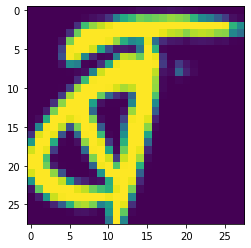

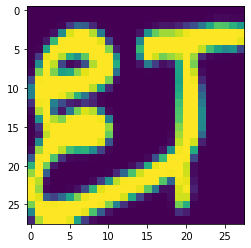

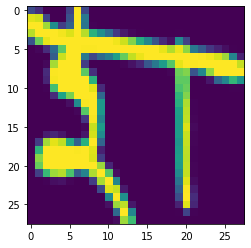

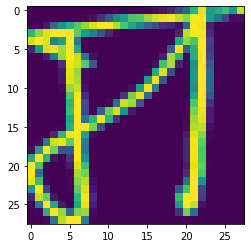

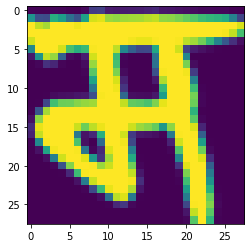

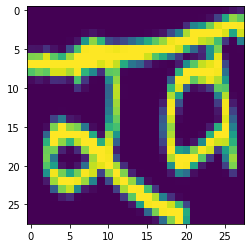

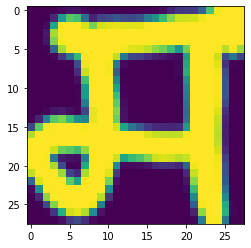

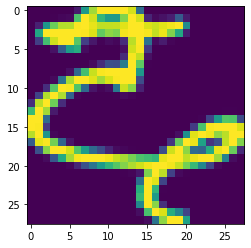

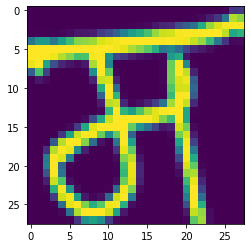

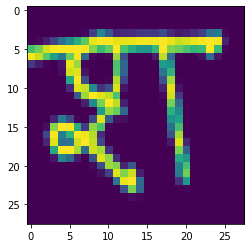

In [33]:
# Loading and visualizing the test dataset
public_test = pd.read_csv('public_test.csv', header=None)
test_data = np.array([np.array(public_test.T.iloc[i]).reshape((28,28)).T.flatten() for i in range(1000)])
print(test_data.shape)
for i in range(0, 10):
    plt.figure()
    plt.imshow(test_data[i,:].reshape(28,28))

In [34]:
# Predicting on the test dataset
pca_mod = PCA(n_components = 50)
Xdata_trans = pca_mod.fit_transform(Xdata)
X_public_test_trans = pca_mod.transform(test_data)
trained_model_final = load('DA_Lab_Final_Model.joblib')
Y_public_test_pred = trained_model_final.predict(X_public_test_trans)

In [35]:
# Saving the results to a CSV file
Ytest_pred_str = [str(pred_val) for pred_val in list(Y_public_test_pred)]
ids = [('Sample_' + str(i)) for i in range(1, 1001)]
df_result = pd.DataFrame({'Id': ids, 'Expected': list(Ytest_pred_str)})
df_result.to_csv('Char_predictions.csv', index = False)